In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
sns.set_style('whitegrid')

plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.minor.size'] = 7
plt.rcParams['xtick.minor.width'] = 2

plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['ytick.minor.size'] = 7
plt.rcParams['ytick.minor.width'] = 2

## Cohort 3, natural vs scrambled syntax, all units

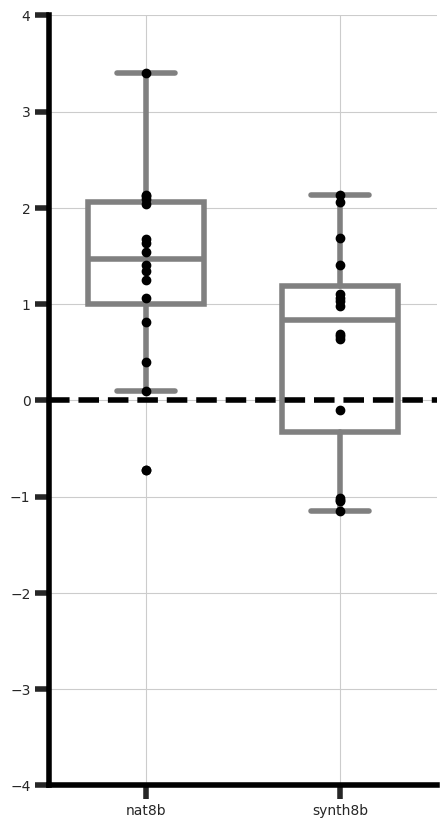

In [9]:
RI_cohort = pd.read_csv(
    "../output/RI_cohort.csv", index_col=[0]
).set_index(['exp','motif','gap'])[['RI']]

fig, ax = plt.subplots(1,1, figsize=(5,10))
ax.axhline(0, lw=4, color='black', ls='--')
for i, c in enumerate(['nat8b','synth8b']):
    bp = ax.boxplot(
        RI_cohort.loc[c],
        positions = [i],
        widths = 0.6,
        patch_artist=True,
        zorder=1
    )
    ax.scatter(
        np.repeat(i, 16),
        RI_cohort.loc[c],
        zorder=10,
        color='black'
    )
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='grey', lw=4)
    for patch in bp['boxes']:
        patch.set(facecolor='white')

ax.set_xticks([0,1], ['nat8b','synth8b'])
#ax.set_yticks([0,1,2],[])
# ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim(-4,4)

plt.setp(ax.spines.values(), lw=4, color='black')
sns.despine(ax=ax, top=True, right=True)


## Cohort 3, subjects

In [4]:
## Run R notebook for estimated means
RI_subject_means = pd.read_csv(
    "../output/RI_subject_means.csv",
    index_col=[0]
).set_index('exp')
RI_subject_means

,emmean,SE,df,t.ratio,p.value
exp,,,,,
nat8b,0.803788,0.272787,6.148938,2.946578,0.024995
synth8b,0.325589,0.272787,6.148938,1.193565,0.276656


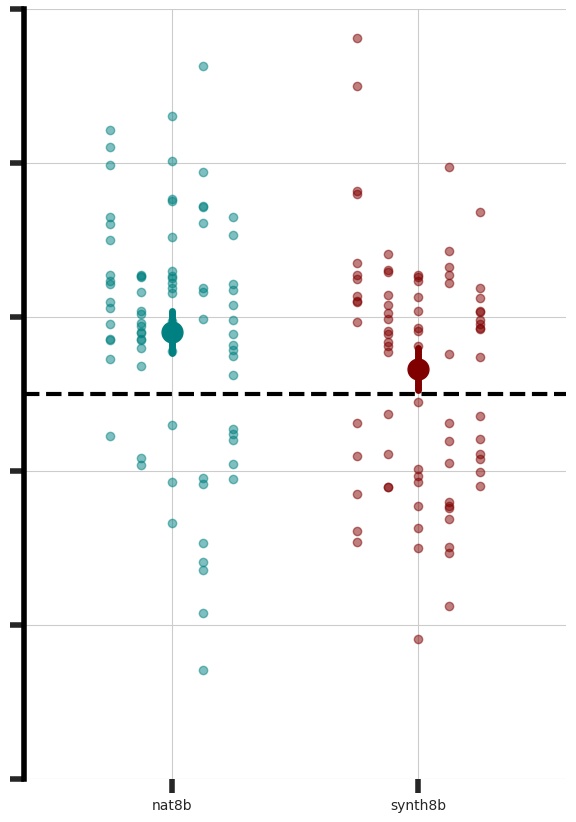

In [5]:
RI_subject = pd.read_csv(
    "../output/RI_subject.csv", index_col=[0]
).set_index(['exp','subject','motif','gap'])[['RI']]

subjects = RI_subject.index.levels[1].tolist()
space = np.linspace(-0.25, 0.25, len(subjects))
space_dict = {sub:spc for sub, spc in zip(subjects, space)}

ax = plt.figure(figsize=(7,10)).add_subplot()
ax.axhline(0, ls='--', lw=3, color='black')

for sub, subdata in RI_subject.groupby(['exp','subject']):
    exp, subject = sub
    col = 'teal' if exp=='nat8b' else 'maroon'
    idx = 0 if exp=='nat8b' else 1
    ax.scatter(
        np.repeat(idx+space_dict[subject], 16),
        subdata,
        color=col,
        alpha=0.5
    )

for exp in ['nat8b', 'synth8b']:
    col = 'teal' if exp=='nat8b' else 'maroon'
    idx = 0 if exp=='nat8b' else 1
    ax.plot(
        idx, RI_subject_means.loc[exp].emmean,
        color=col, ls='', marker='o',
        markersize = 15, markerfacecolor=col
    )
    
    ax.plot(
        [idx, idx], [
            RI_subject_means.loc[exp].emmean - RI_subject_means.loc[exp].SE,
            RI_subject_means.loc[exp].emmean + RI_subject_means.loc[exp].SE,
        ], color=col, lw=5
    )

    
ax.set_ylim(-5,5)
ax.set_xlim(-0.6,1.6)
ax.set_yticks([-5,-3,-1,1,3,5], [])
ax.set_xticks([0,1], ['nat8b', 'synth8b'])
plt.setp(ax.spines.values(), lw=4, color='black')
sns.despine(ax=ax, top=True, bottom=True, right=True)

## Cohort 3, regions

In [6]:
## Run R notebook for estimated means
RI_region_means = pd.read_csv(
    "../output/RI_region_means.csv",
    index_col=[0]
).set_index(['exp', 'region'])
RI_region_means

,,emmean,SE,df,t.ratio,p.value
exp,region,,,,,
nat8b,CM,0.068576,0.933623,6.002495,0.073452,0.943833
synth8b,CM,0.356630,0.933623,6.002495,0.381985,0.715630
nat8b,L2,1.333242,0.826720,4.548907,1.612688,0.173479
synth8b,L2,-0.733269,0.830938,4.626393,-0.882459,0.421008
nat8b,NCM,1.755993,0.915956,5.995985,1.917116,0.103712
synth8b,NCM,0.653130,1.025655,8.132398,0.636793,0.541766


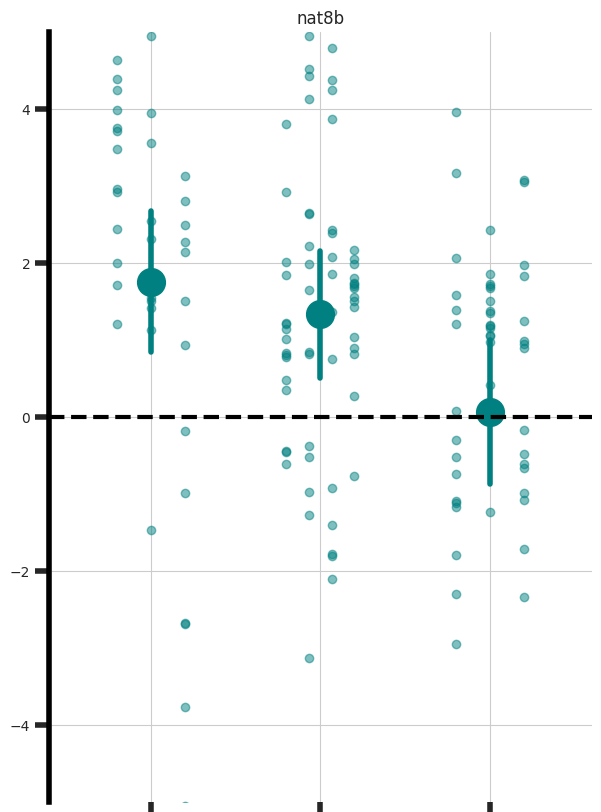

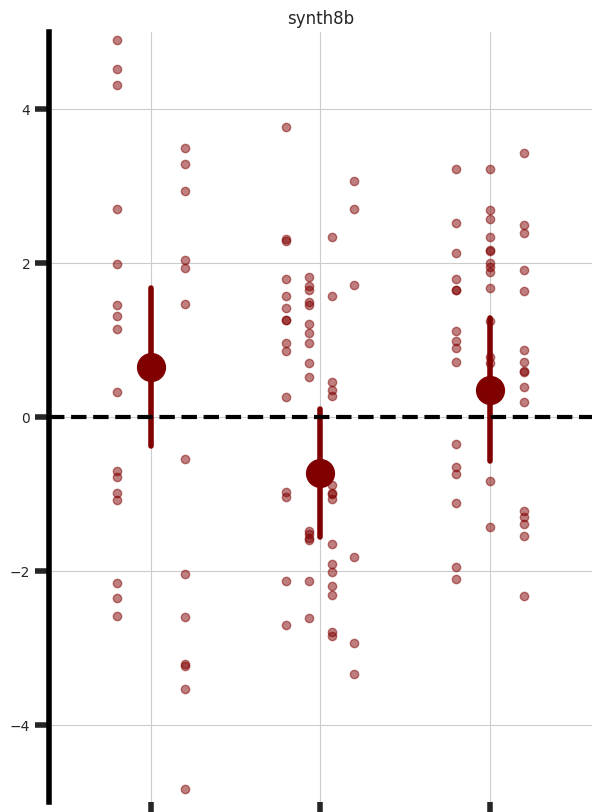

In [10]:
RI_region = pd.read_csv(
    "../output/RI_region.csv", index_col=[0]
).set_index(['exp','region','subject','recording','motif','gap'])[['RI']].sort_index()

for exp in ['nat8b', 'synth8b']:
    col = 'teal' if exp=='nat8b' else 'maroon'
    ax = plt.figure(figsize=(7,10)).add_subplot()
    ax.set_title(exp)
    for irg, region in enumerate(['NCM', 'L2', 'CM']):
        dt = RI_region.loc[exp, region]
        nrec = len(dt.index.get_level_values('recording').unique())
        space = np.linspace(-0.2, 0.2, nrec)
        for irc, (rec, recdata) in enumerate(dt.groupby('recording')):
            ax.plot(
                np.repeat(irg+space[irc], 16), recdata,
                color=col,ls='',marker='o', alpha=0.5
            )

        ax.plot(
            [irg,irg], [
                RI_region_means.loc[exp, region].emmean - RI_region_means.loc[exp, region].SE,
                RI_region_means.loc[exp, region].emmean + RI_region_means.loc[exp, region].SE
            ], color=col, lw=4)
        ax.plot(
            irg, RI_region_means.loc[exp, region].emmean,
            color=col, lw=4, marker='o', markersize=20, markerfacecolor=col
        )
    ax.axhline(0, ls='--', lw=3, color='black')
    ax.set_ylim(-5,5)
    ax.set_xlim(-0.6, 2.6)
    #ax.set_yticks([-2,-1,0,1,2], [])
    ax.set_xticks([0,1,2], [])
    plt.setp(ax.spines.values(), lw=4, color='black')
    sns.despine(ax=ax, top=True, bottom=True, right=True)